In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = "data/"
AFDB_2019 = "Data.csv"
db_zero = pd.read_csv(DATA_PATH + AFDB_2019, sep=',')

INDICATORS = "Indicator.csv"
inds = pd.read_csv(DATA_PATH + INDICATORS, sep=',')

print(db_zero.shape)
db_zero.dropna(subset=['Date', 'Value','Country','Indicator'],inplace = True) #instead of any by default, which concludes our rows are good
print(db_zero.shape)


db_zero.Date = db_zero.Date.apply(lambda x : x.split("-")[0]).astype(int)
db_zero.rename(columns = {'Date':'Year'}, inplace = True)
db_zero.Scale = db_zero.Scale.astype(int)
db_zero.Value = db_zero.Value.astype(float)
db_zero.head()

(2792569, 9)
(2792569, 9)


,CountryName,Country,IndicatorName,Indicator,Units,Scale,Frequency,Year,Value
0,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2000,9.133374
1,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2001,8.535367
2,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2002,7.238168
3,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2003,7.217622
4,AFRICA,AFR,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,annual %,1,A,2004,7.373657


In [3]:
db = pd.pivot_table(db_zero, values='Value', index=['Country', 'Year'], columns=['Indicator'])
print(db.shape)
db.head()

(9850, 1279)


Indicator     AFDB_CPIA_EM_DB_S  AFDB_CPIA_EM_FP_S  AFDB_CPIA_EM_MM_S  \
Country Year                                                            
ADB     1960                NaN                NaN                NaN   
        1961                NaN                NaN                NaN   
        1962                NaN                NaN                NaN   
        1963                NaN                NaN                NaN   
        1964                NaN                NaN                NaN   

Indicator     AFDB_CPIA_EM_S  AFDB_CPIA_IRI_ID_S  AFDB_CPIA_IRI_RI_S  \
Country Year                                                           
ADB     1960             NaN                 NaN                 NaN   
        1961             NaN                 NaN                 NaN   
        1962             NaN                 NaN                 NaN   
        1963             NaN                 NaN                 NaN   
        1964             NaN                 NaN                 NaN   

Indicator     AFDB_CPIA_N  AFDB_CPIA_PSIE_BHR_S  AFDB_CPIA_PSIE_EPRU_S  \
Country Year                                                             
ADB     1960          NaN                   NaN                    NaN   
        1961          NaN                   NaN                    NaN   
        1962          NaN                   NaN                    NaN   
        1963          NaN                   NaN                    NaN   
        1964          NaN                   NaN                    NaN   

Indicator     AFDB_CPIA_PSIE_EPR_S  ...  TG.WEO.TXGXO_R.KD  TG.WEO.TXG_D.WD  \
Country Year                        ...                                       
ADB     1960                   NaN  ...                NaN              NaN   
        1961                   NaN  ...                NaN              NaN   
        1962                   NaN  ...                NaN              NaN   
        1963                   NaN  ...                NaN              NaN   
        1964                   NaN  ...                NaN              NaN   

Indicator     TG.WEO.TXG_R.KD  TG.WEO.TXG_R.ZG  TG.WEO.TXS.CD  TG.WEO.TX_D.WD  \
Country Year                                                                    
ADB     1960              NaN              NaN            NaN             NaN   
        1961              NaN              NaN            NaN             NaN   
        1962              NaN              NaN            NaN             NaN   
        1963              NaN              NaN            NaN             NaN   
        1964              NaN              NaN            NaN             NaN   

Indicator     TG.WEO.TX_R.KD  TG.WEO.TX_R.ZG  VC.PRS.UNSEC  indicateur3  
Country Year                                                             
ADB     1960             NaN             NaN           NaN          NaN  
        1961             NaN             NaN           NaN          NaN  
        1962             NaN             NaN           NaN          NaN  
        1963             NaN             NaN           NaN          NaN  
        1964             NaN             NaN           NaN          NaN  

[5 rows x 1279 columns]

In [4]:
#db.loc['CIV',1960]

In [5]:
db_verif = db.dropna(how='all')
db_verif.shape
#Still, no key(country,year) has all nans, each key has its indicators !

(9850, 1279)

In [8]:
inds_social = inds[inds['Parent']=='KN.B14']
print(inds.shape)
print(inds_social.shape)

(1677, 11)
(411, 11)


In [9]:
def lowercase_all(text):
    return text.lower()

In [10]:
education_keywords = ['education','literacy','enroll','school','teach','pupil','student','repeater']
inds_education = inds[inds.Name.apply(lowercase_all).str.contains('|'.join(education_keywords))]

In [11]:
inds_education.shape
inds_education.head()

,Order,Name,Parent,Code,Indicator_Id,Source_Note,Derivation_Rule,IsDerived,Weights_Indicator,Aggregation_Rule,Unit
638,639,Governance-Health and primary education (Score),KN.B13,PS.WGI.GOV.COMP.HEALT,854.0,Worldwide Governance Indicators (WGI): Politic...,NaN,0.0,NaN,NaN,Score
639,640,Governance-Higher education and training (Score),KN.B13,PS.WGI.GOV.COMP.HEDU,855.0,Worldwide Governance Indicators (WGI): Politic...,NaN,0.0,NaN,NaN,Score
669,670,Global Competitiveness Index: Health and prima...,KN.B13,PS.WGI.GOV.COMP.HEALTH.RANK,1228.0,The Global Competitiveness,NaN,0.0,NaN,NaN,NaN
670,671,Global Competitiveness Index: Health and prima...,KN.B13,PS.WGI.GOV.COMP.HEALTH.Score,1244.0,NaN,NaN,0.0,NaN,NaN,NaN
671,672,Global Competitiveness Index: Higher education...,KN.B13,PS.WGI.GOV.COMP.HEDUC.RANK,1230.0,The Global Competitiveness,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1636,1637,Teaching staff at second level - Total (number),KN.B14,CTRY.SE.TCHR.SECOND,1878.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1637,1638,Teaching staff at third level - Total (number),KN.B14,CTRY.SE.TCHR.THIRD,1879.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1638,1639,Third level student enrollment - Female (number),KN.B14,CTRY.SE.TER.ENRR.FE.TOT,1792.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number
1639,1640,Third level student enrollment - Total (number),KN.B14,CTRY.SE.TER.ENRR.TOT,1793.0,Source: National Statistics Offices,NaN,0.0,NaN,NaN,number


In [12]:
education_codes = inds_education.Code.tolist()

In [39]:
db_education = db_zero[db_zero.Indicator.str.match('|'.join(education_codes))]
db_education.head()

In [24]:
db = pd.pivot_table(db_education, values='Value', index=['Country', 'Year'], columns=['Indicator'])

In [25]:
count = 0
for i in range(db.shape[1])  :  
    val = db.isnull().sum()[i]
    if (val > 0.7*db.shape[0]):
        count +=1 

print(db.shape)

db.dropna(axis=1,thresh=int(0.7*db.shape[0]),inplace=True)
print(db.shape)

(4910, 98)
(4910, 24)


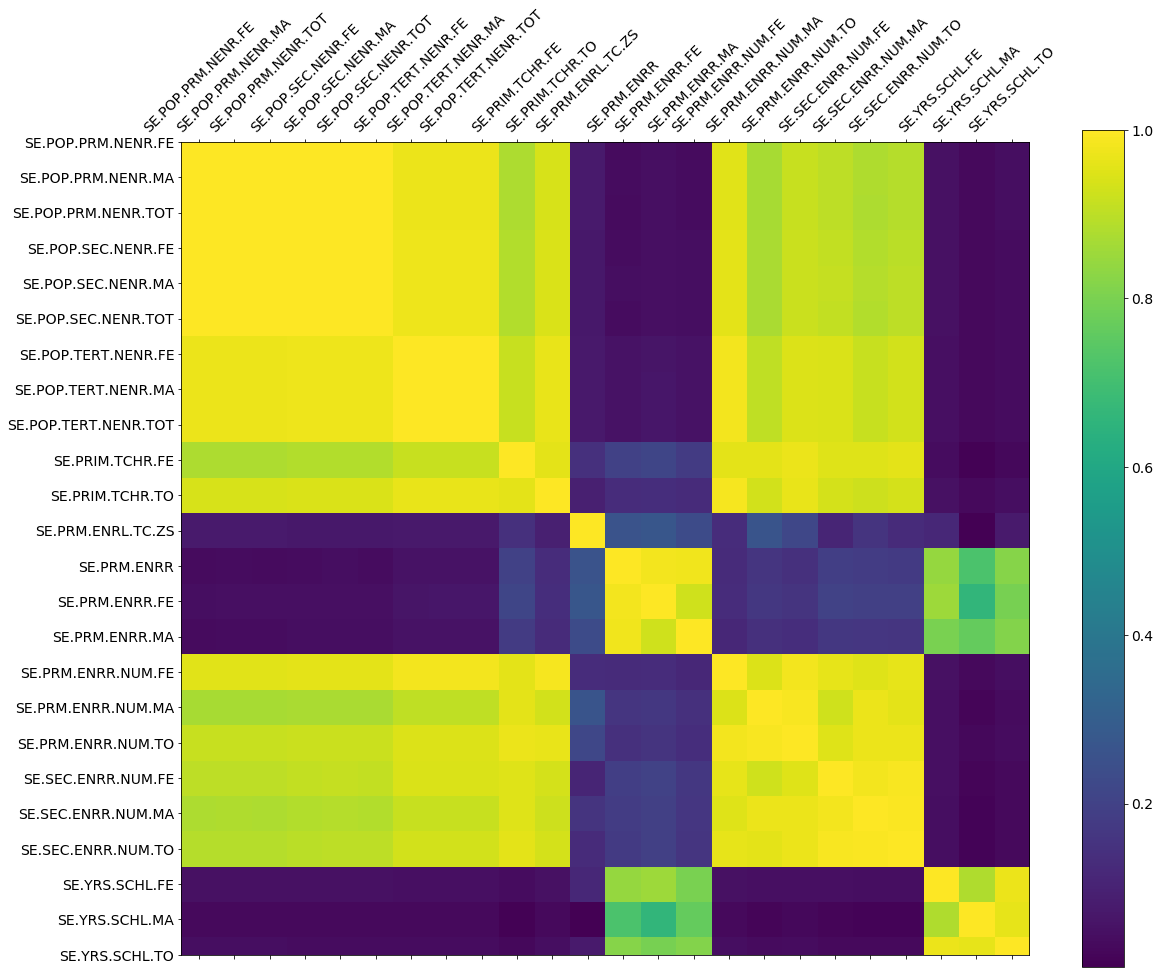

In [38]:
f = plt.figure(figsize=(19, 15))
plt.matshow(db.corr(), fignum=f.number)
plt.xticks(range(db.shape[1]), db.columns, fontsize=14, rotation=45)
plt.yticks(range(db.shape[1]), db.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [37]:
corr = db.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Indicator,SE.POP.PRM.NENR.FE,SE.POP.PRM.NENR.MA,SE.POP.PRM.NENR.TOT,SE.POP.SEC.NENR.FE,SE.POP.SEC.NENR.MA,SE.POP.SEC.NENR.TOT,SE.POP.TERT.NENR.FE,SE.POP.TERT.NENR.MA,SE.POP.TERT.NENR.TOT,SE.PRIM.TCHR.FE,SE.PRIM.TCHR.TO,SE.PRM.ENRL.TC.ZS,SE.PRM.ENRR,SE.PRM.ENRR.FE,SE.PRM.ENRR.MA,SE.PRM.ENRR.NUM.FE,SE.PRM.ENRR.NUM.MA,SE.PRM.ENRR.NUM.TO,SE.SEC.ENRR.NUM.FE,SE.SEC.ENRR.NUM.MA,SE.SEC.ENRR.NUM.TO,SE.YRS.SCHL.FE,SE.YRS.SCHL.MA,SE.YRS.SCHL.TO
Indicator,,,,,,,,,,,,,,,,,,,,,,,,
SE.POP.PRM.NENR.FE,1,1,1,0.999,0.999,0.999,0.972,0.972,0.972,0.877,0.94,0.0768,0.0361,0.0445,0.0364,0.955,0.871,0.916,0.901,0.879,0.89,0.0506,0.0321,0.0416
SE.POP.PRM.NENR.MA,1,1,1,1,1,1,0.972,0.972,0.972,0.879,0.94,0.0764,0.038,0.0464,0.0382,0.955,0.872,0.917,0.902,0.88,0.891,0.0506,0.0319,0.0415
SE.POP.PRM.NENR.TOT,1,1,1,1,0.999,1,0.972,0.972,0.972,0.878,0.94,0.0766,0.0371,0.0454,0.0373,0.955,0.871,0.916,0.902,0.88,0.891,0.0506,0.032,0.0416
SE.POP.SEC.NENR.FE,0.999,1,1,1,1,1,0.975,0.975,0.975,0.885,0.943,0.07,0.0399,0.0466,0.0422,0.959,0.875,0.92,0.91,0.887,0.899,0.0496,0.031,0.0406
SE.POP.SEC.NENR.MA,0.999,1,0.999,1,1,1,0.975,0.975,0.975,0.885,0.943,0.0689,0.0417,0.0485,0.044,0.959,0.876,0.92,0.911,0.887,0.899,0.0496,0.0308,0.0405
SE.POP.SEC.NENR.TOT,0.999,1,1,1,1,1,0.975,0.975,0.975,0.885,0.943,0.0694,0.0408,0.0475,0.0431,0.959,0.875,0.92,0.911,0.887,0.899,0.0496,0.0309,0.0405
SE.POP.TERT.NENR.FE,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.917,0.967,0.074,0.0544,0.0639,0.0537,0.984,0.904,0.949,0.943,0.918,0.932,0.0484,0.03,0.0395
SE.POP.TERT.NENR.MA,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.918,0.967,0.0726,0.0562,0.0656,0.0557,0.984,0.905,0.949,0.944,0.918,0.933,0.0484,0.0298,0.0393
SE.POP.TERT.NENR.TOT,0.972,0.972,0.972,0.975,0.975,0.975,1,1,1,0.917,0.967,0.0733,0.0553,0.0648,0.0547,0.984,0.905,0.949,0.943,0.918,0.933,0.0484,0.0299,0.0394


In [80]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop
db

Indicator     SE.POP.PRM.NENR.FE  SE.POP.PRM.NENR.MA  SE.POP.PRM.NENR.TOT  \
Country Year                                                                
ADB     1970           8425795.0           8703212.0           17129007.0   
        1971           8642361.0           8917403.0           17559764.0   
        1972           8871519.0           9123897.0           17995416.0   
        1973           9101508.0           9341542.0           18443050.0   
        1974           9320069.0           9556953.0           18877022.0   
...                          ...                 ...                  ...   
ZZM     2005                 NaN                 NaN                  NaN   
        2006                 NaN                 NaN                  NaN   
        2007                 NaN                 NaN                  NaN   
        2008                 NaN                 NaN                  NaN   
        2009                 NaN                 NaN                  NaN   

Indicator     SE.POP.SEC.NENR.FE  SE.POP.SEC.NENR.MA  SE.POP.SEC.NENR.TOT  \
Country Year                                                                
ADB     1970           6972860.0           7160116.0           14132976.0   
        1971           7213778.0           7442764.0           14656542.0   
        1972           7435479.0           7678672.0           15114151.0   
        1973           7657374.0           7917170.0           15574544.0   
        1974           7879640.0           8156485.0           16036125.0   
...                          ...                 ...                  ...   
ZZM     2005                 NaN                 NaN                  NaN   
        2006                 NaN                 NaN                  NaN   
        2007                 NaN                 NaN                  NaN   
        2008                 NaN                 NaN                  NaN   
        2009                 NaN                 NaN                  NaN   

Indicator     SE.POP.TERT.NENR.FE  SE.POP.TERT.NENR.MA  SE.POP.TERT.NENR.TOT  \
Country Year                                                                   
ADB     1970            4550689.0            4516016.0             9066705.0   
        1971            4706243.0            4688634.0             9394877.0   
        1972            4860342.0            4859147.0             9719489.0   
        1973            5019680.0            5039486.0            10059166.0   
        1974            5182667.0            5227482.0            10410149.0   
...                           ...                  ...                   ...   
ZZM     2005                  NaN                  NaN                   NaN   
        2006                  NaN                  NaN                   NaN   
        2007                  NaN                  NaN                   NaN   
        2008                  NaN                  NaN                   NaN   
        2009                  NaN                  NaN                   NaN   

Indicator     SE.PRIM.TCHR.FE  ...  SE.PRM.ENRR.MA  SE.PRM.ENRR.NUM.FE  \
Country Year                   ...                                       
ADB     1970        185.48046  ...       85.688630           2138145.0   
        1971        394.08481  ...       83.313919           3406064.0   
        1972        325.34500  ...       85.559903           3616378.0   
        1973        330.65757  ...       86.541482           3617186.0   
        1974        385.97007  ...       86.374728           3763416.0   
...                       ...  ...             ...                 ...   
ZZM     2005              NaN  ...             NaN                 NaN   
        2006              NaN  ...             NaN                 NaN   
        2007              NaN  ...             NaN                 NaN   
        2008              NaN  ...             NaN                 NaN   
        2009              NaN  ...             NaN                 

In [75]:
# Find index of feature columns with correlation greater than 0.95
to_keep = [element for element in upper.columns if element not in to_drop]
to_keep
db_keep = db[to_keep]
db_keep.shape

(4910, 6)

In [70]:
upper.columns.tolist()

['SE.POP.PRM.NENR.FE',
 'SE.POP.PRM.NENR.MA',
 'SE.POP.PRM.NENR.TOT',
 'SE.POP.SEC.NENR.FE',
 'SE.POP.SEC.NENR.MA',
 'SE.POP.SEC.NENR.TOT',
 'SE.POP.TERT.NENR.FE',
 'SE.POP.TERT.NENR.MA',
 'SE.POP.TERT.NENR.TOT',
 'SE.PRIM.TCHR.FE',
 'SE.PRIM.TCHR.TO',
 'SE.PRM.ENRL.TC.ZS',
 'SE.PRM.ENRR',
 'SE.PRM.ENRR.FE',
 'SE.PRM.ENRR.MA',
 'SE.PRM.ENRR.NUM.FE',
 'SE.PRM.ENRR.NUM.MA',
 'SE.PRM.ENRR.NUM.TO',
 'SE.SEC.ENRR.NUM.FE',
 'SE.SEC.ENRR.NUM.MA',
 'SE.SEC.ENRR.NUM.TO',
 'SE.YRS.SCHL.FE',
 'SE.YRS.SCHL.MA',
 'SE.YRS.SCHL.TO']

In [91]:
to_keep = pd.Series(to_keep).replace(['SE.POP.PRM.NENR.FE', 'SE.PRIM.TCHR.FE'],
                                     ['SE.POP.PRM.NENR.TOT', 'SE.PRIM.TCHR.TO']).tolist()
to_keep

['SE.POP.PRM.NENR.TOT',
 'SE.PRIM.TCHR.TO',
 'SE.PRM.ENRL.TC.ZS',
 'SE.PRM.ENRR',
 'SE.YRS.SCHL.FE',
 'SE.YRS.SCHL.MA']

In [92]:
db_keep = db[to_keep]
db_keep
corr_keep = db_keep.corr()
corr_keep.style.background_gradient(cmap='coolwarm').set_precision(3)

Indicator,SE.POP.PRM.NENR.TOT,SE.PRIM.TCHR.TO,SE.PRM.ENRL.TC.ZS,SE.PRM.ENRR,SE.YRS.SCHL.FE,SE.YRS.SCHL.MA
Indicator,,,,,,
SE.POP.PRM.NENR.TOT,1,0.94,0.0766,0.0371,0.0506,0.032
SE.PRIM.TCHR.TO,0.94,1,0.0934,0.13,0.0507,0.0314
SE.PRM.ENRL.TC.ZS,0.0766,0.0934,1,0.26,0.116,0.00612
SE.PRM.ENRR,0.0371,0.13,0.26,1,0.842,0.72
SE.YRS.SCHL.FE,0.0506,0.0507,0.116,0.842,1,0.883
SE.YRS.SCHL.MA,0.032,0.0314,0.00612,0.72,0.883,1
